In [155]:
from astropy.io import ascii 
import matplotlib.pylab as pl 
import numpy as np
from astropy.table import Table


['sn', 'res', 'eres', 'zcmb', 'st', 'B-V', 'm', 'ml', 'mu', 'sample', 'cal']


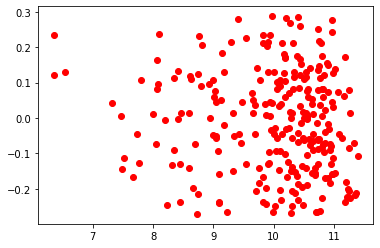

In [156]:
tab = ascii.read('../../results/Ceph_res_B_nohm.csv',format='csv')

w = np.where(tab['m']!= 11.5)
tab=tab[w]
w = np.where(np.abs(tab['res'])<np.std(tab['res']))
tab=tab[w]

print((tab.colnames))

pl.plot(tab['m'],tab['res'],'ro')

In [157]:
mres=[]
emres=[]
off=[]
eoff=[]
# Randomization 
for i in range(10000):
    for col in tab.colnames:
        tab[col] = np.random.permutation(tab[col])
        mass = np.random.permutation(tab['m'])
        emu = tab['mu']-tab['m']
        eml = tab['m'] -tab['ml']
        res = tab['res']
        eres = tab['eres']
        
    wl=np.where(mass<10)
    wh=np.where(mass>10)
    
    err_int=(np.std(res)) - (np.mean(eres))
    
    wt= np.sqrt(1/((eres**2)+(err_int**2))) # weights
    #wt= 1/((eres**2.)+(err_int**.2)) # weights
    
    # Full sample 
    mean_x1= np.sum(res*wt)/np.sum(wt)
    error_x1= np.sqrt((1/np.sum(wt)))
    
    # Low
    mean_x1_low= np.sum(res[wl]*wt[wl])/np.sum(wt[wl])
    error_x1_low= np.sqrt((1/np.sum(wt[wl])))
    
    #high
    
    mean_x1_high= np.sum(res[wh]*wt[wh])/np.sum(wt[wh])
    error_x1_high =np.sqrt((1/np.sum(wt[wh])))
    
    off.append(float('%6.2f'%(mean_x1_high-mean_x1_low))) 
    eoff.append('%6.2f'%(np.sqrt((error_x1_low**2)+(error_x1_high**2))))
    
        


Text(0.5, 0, 'r$\\Delta \\mu$')

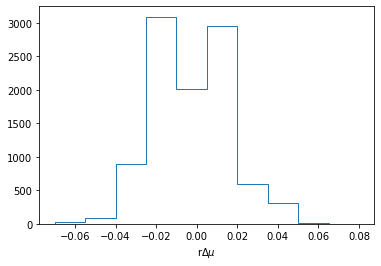

In [162]:
#pl.errorbar(mass,res,xerr=[emu,eml],yerr=eres, fmt='o')
pl.hist(off,histtype='step')
pl.xlabel("r$\Delta \mu$")


In [159]:

print(np.mean(off)) 

-0.00041000000000000005
